Mounted at /content/drive/
Imagen Original: 


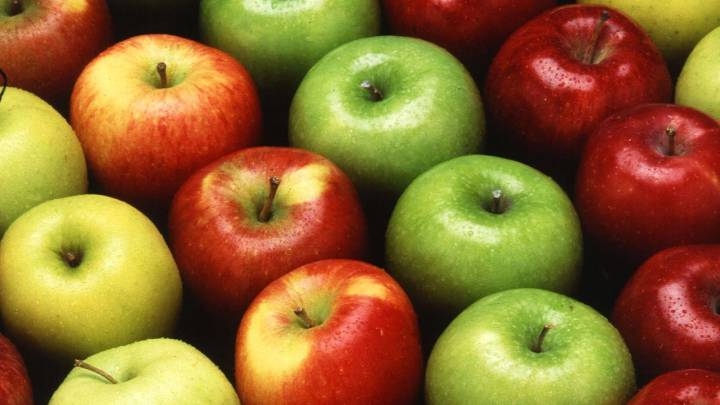

Imagen Segmentada: 


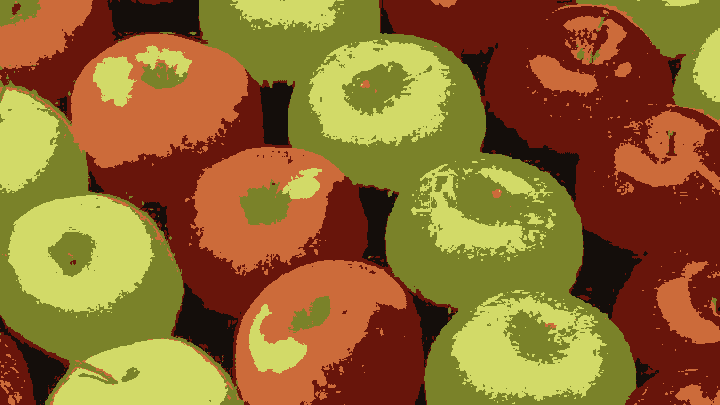

In [1]:
import numpy as np
import cv2
from sklearn.mixture import GaussianMixture
from google.colab.patches import cv2_imshow

from google.colab import drive
drive.mount('/content/drive/')

#You can find the image in this link: https://images.app.goo.gl/1GUvnp7FDS4JJ1gC8
dir='/manzanas.jpg'

# Load image
img = cv2.imread(dir)

# Convert image to LAB color space
lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Reshape image to 2D array of pixels
reshaped_img = img.reshape(-1, 3)

# Fit GMM with 5 components
gmm = GaussianMixture(n_components=5, max_iter=200, tol=1e-4)
gmm.fit(reshaped_img)

# Predict cluster labels for each pixel
labels= gmm.predict(reshaped_img)

# convert back to 8 bit values of the centers
centers = np.uint8(gmm.means_)

# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(img.shape)

# Display images:
print('Imagen Original: ')
cv2_imshow(img)
print('Imagen Segmentada: ')
cv2_imshow(segmented_image)
